# 3.6.1 Спектральный анализ электрических сигналов

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mygraph as mg
import pandas as pd
from matplotlib.ticker import EngFormatter

tau = 50e-6
T = 1e-3
def an_t(n):
   return np.sin(np.pi*n*tau/T)/np.pi/n 

ns = np.array( [1,2,3,4,5,6] )
an_ts = an_t(ns)
a1_t = an_t(1)

an_ts/a1_t

array([1.        , 0.98768834, 0.96737101, 0.93934743, 0.9040294 ,
       0.86193388])

Коэффиценты прямой: k, s_k, b, s_b
1.0	7.450580596923828e-09	3.637978807091713e-12	0.000130385160446167


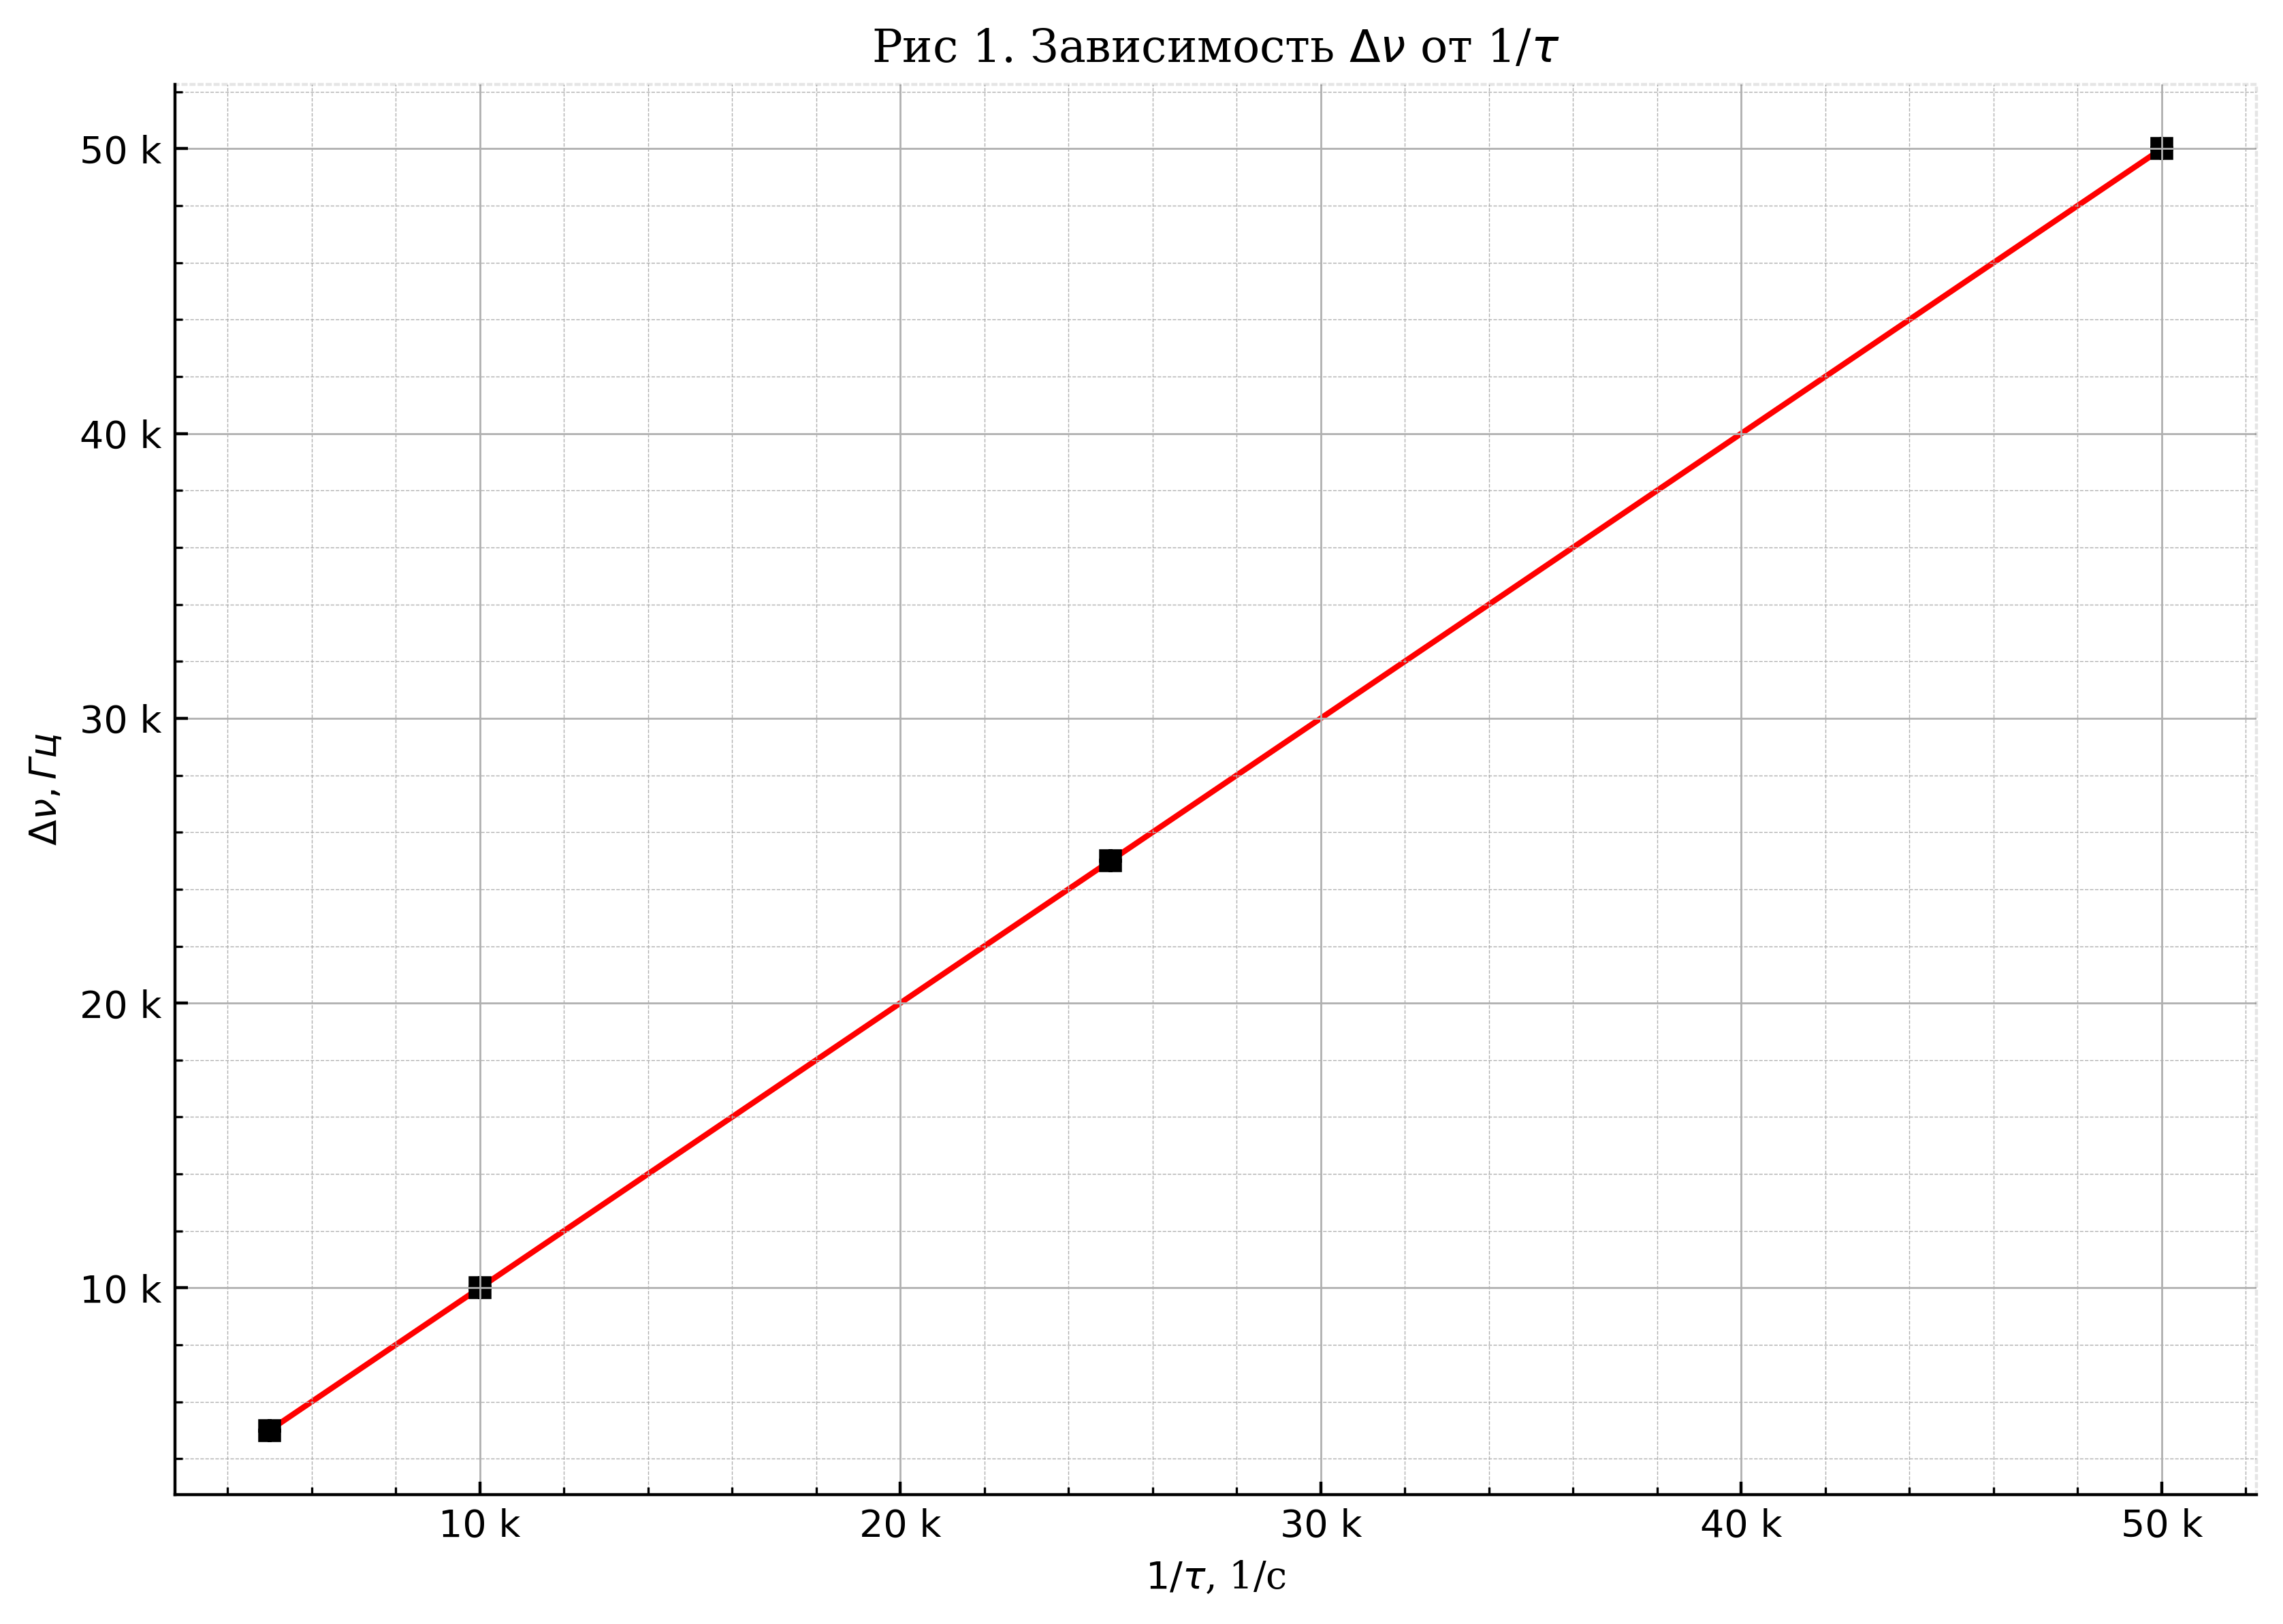

In [2]:
X = 1 / np.array( [ 20e-6, 40e-6, 100e-6, 200e-6 ] )
Y = np.array( [ 50e3, 25e3, 10e3, 5e3 ] )

fig = mg.make_figure(dpi_mode='high')
ax = fig.add_subplot()
formatter1 = EngFormatter(places=0) 
ax.xaxis.set_major_formatter(formatter1)
ax.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig)
mg.set_title(ax, r'Зависимость $\Delta \nu$ от 1/$\tau$')
mg.set_label(ax, r'$1/\tau$, 1/c', r'$\Delta \nu, Гц$')

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax, X, Y)
mg.display_linls(ax)

Коэффиценты прямой: k, s_k, b, s_b
1.0	0.0	0.0	0.0


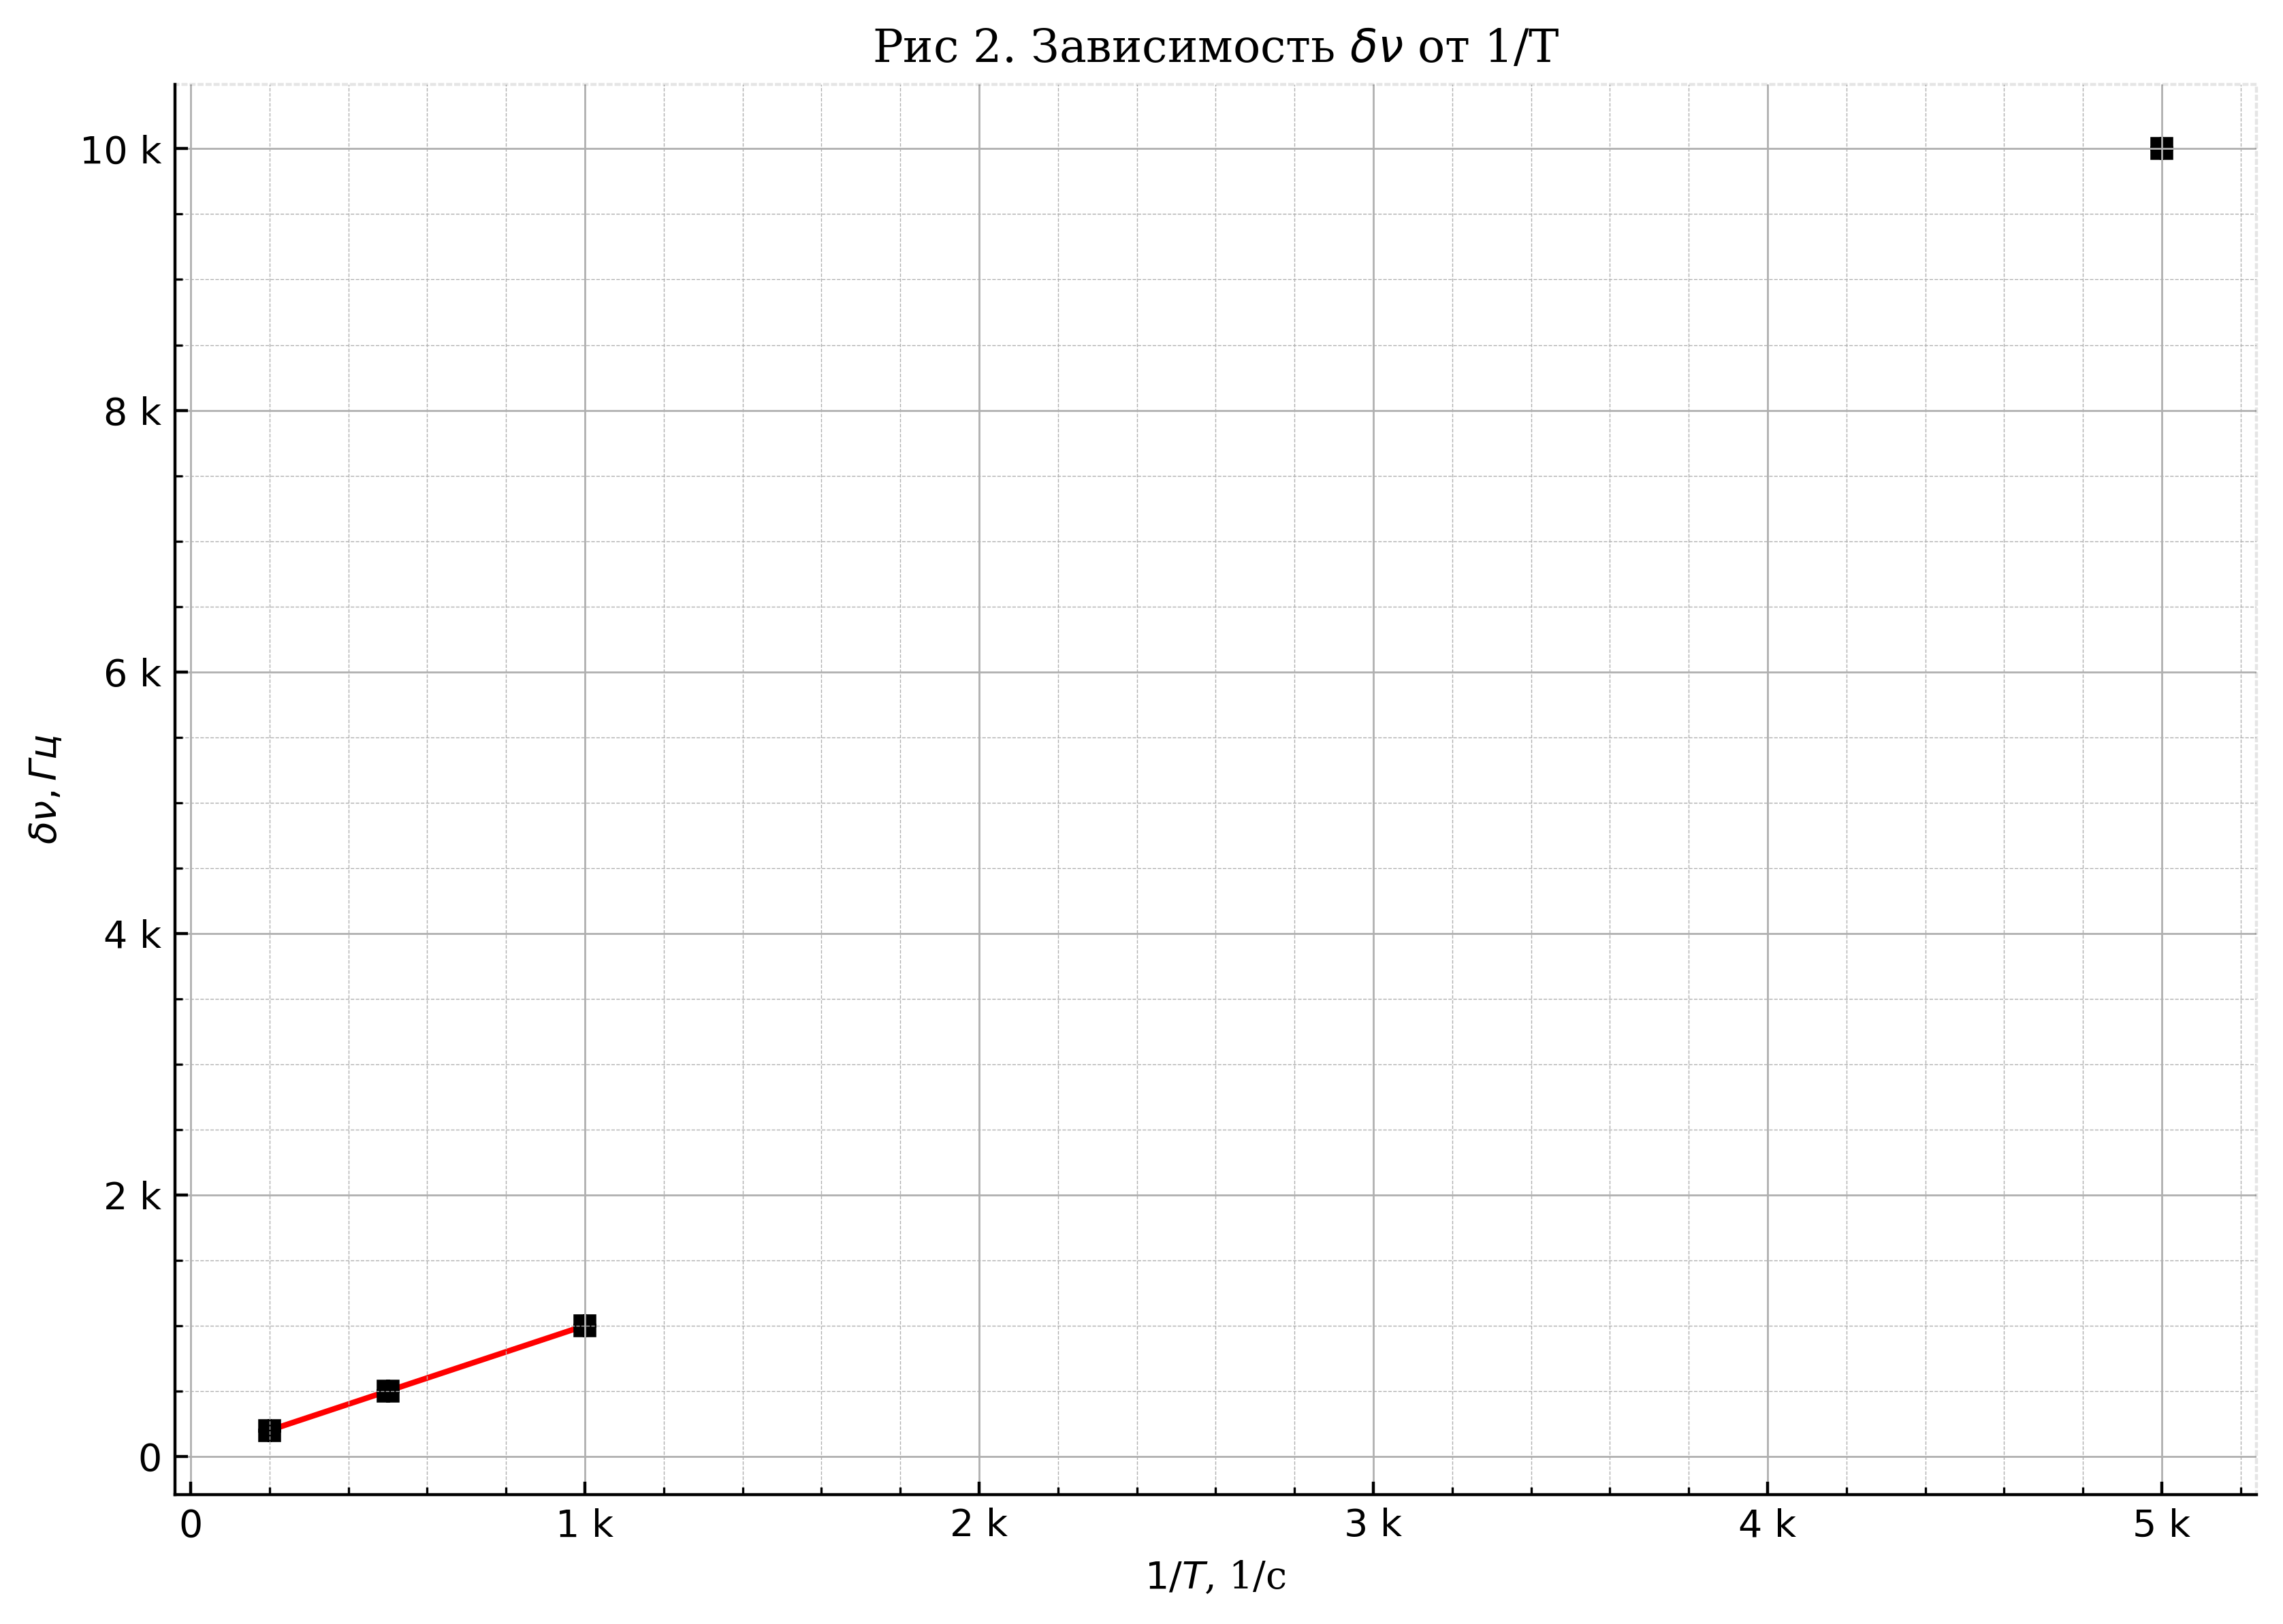

In [3]:
X = 1 / np.array( [ 200e-6, 1000e-6, 2000e-6, 5000e-6 ] )
Y = np.array( [ 10e3, 1e3, 0.5e3, 0.2e3 ] )

fig1 = mg.make_figure(dpi_mode='high')
ax1 = fig1.add_subplot()
formatter1 = EngFormatter(places=0) 
ax1.xaxis.set_major_formatter(formatter1)
ax1.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig1)
mg.set_title(ax1, r'Зависимость $\delta \nu$ от 1/T')
mg.set_label(ax1, r'$1/T$, 1/c', r'$\delta \nu, Гц$')

k, s_k, b, s_b = mg.linls(X[1:], Y[1:])
mg.draw_errorbar(ax1, X, Y)
mg.display_linls(ax1)

Коэффиценты прямой: k, s_k, b, s_b
0.4976760270843583	0.0010727946553305886	-0.0011258473188757723	0.00034159521853139636


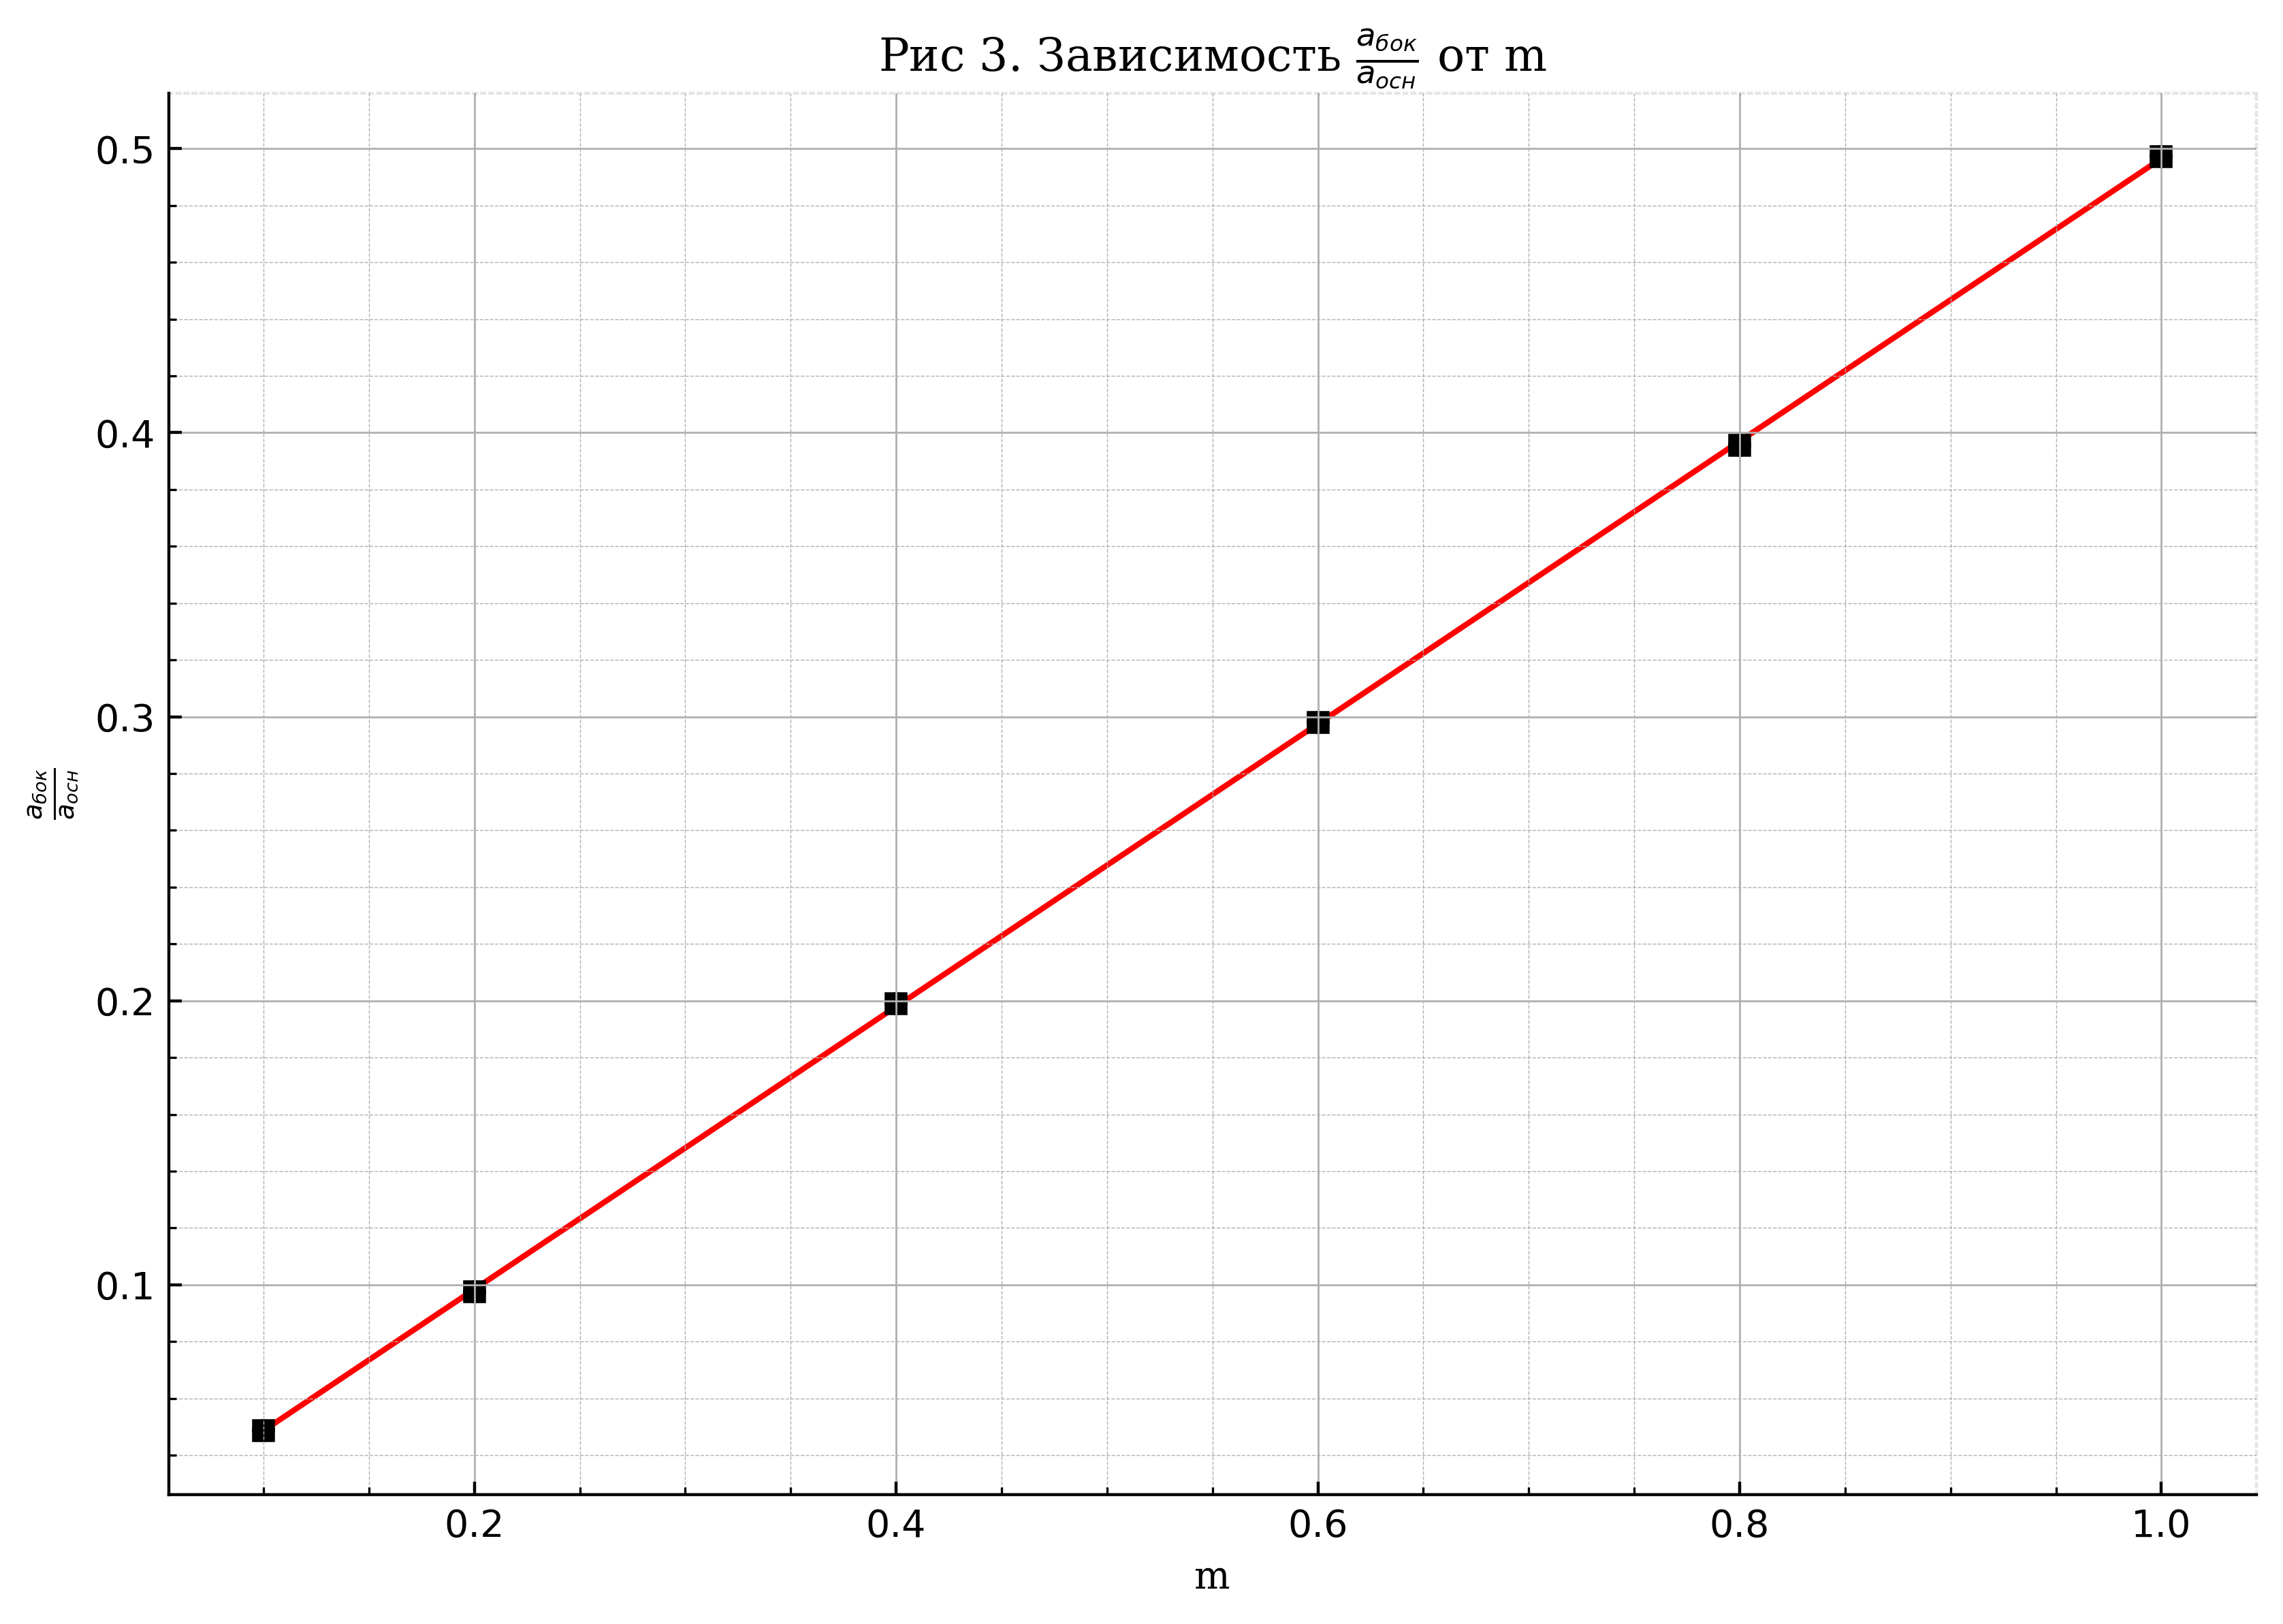

In [4]:
a_side = np.array( [28.65, 57.33, 116.9, 175.0, 232.4, 292] )
a_main = np.array( [587.6, 587.4, 587.4, 587.4, 587.4, 587.4] )
Y = a_side / a_main
X = np.array( [ 0.1, 0.2, 0.4, 0.6, 0.8, 1 ] )

fig2 = mg.make_figure(dpi_mode='high')
ax2 = fig2.add_subplot()
formatter1 = EngFormatter(places=0) 
# ax2.xaxis.set_major_formatter(formatter1)
# ax2.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig2)
mg.set_title(ax2, r'Зависимость $\frac{a_{бок}}{a_{осн}}$ от m')
mg.set_label(ax2, r'm', r'$\frac{a_{бок}}{a_{осн}}$' )

k, s_k, b, s_b = mg.linls(X, Y)
mg.draw_errorbar(ax2, X, Y)
mg.display_linls(ax2)

a, b = 1.088885E+05, 0.002987961956998152


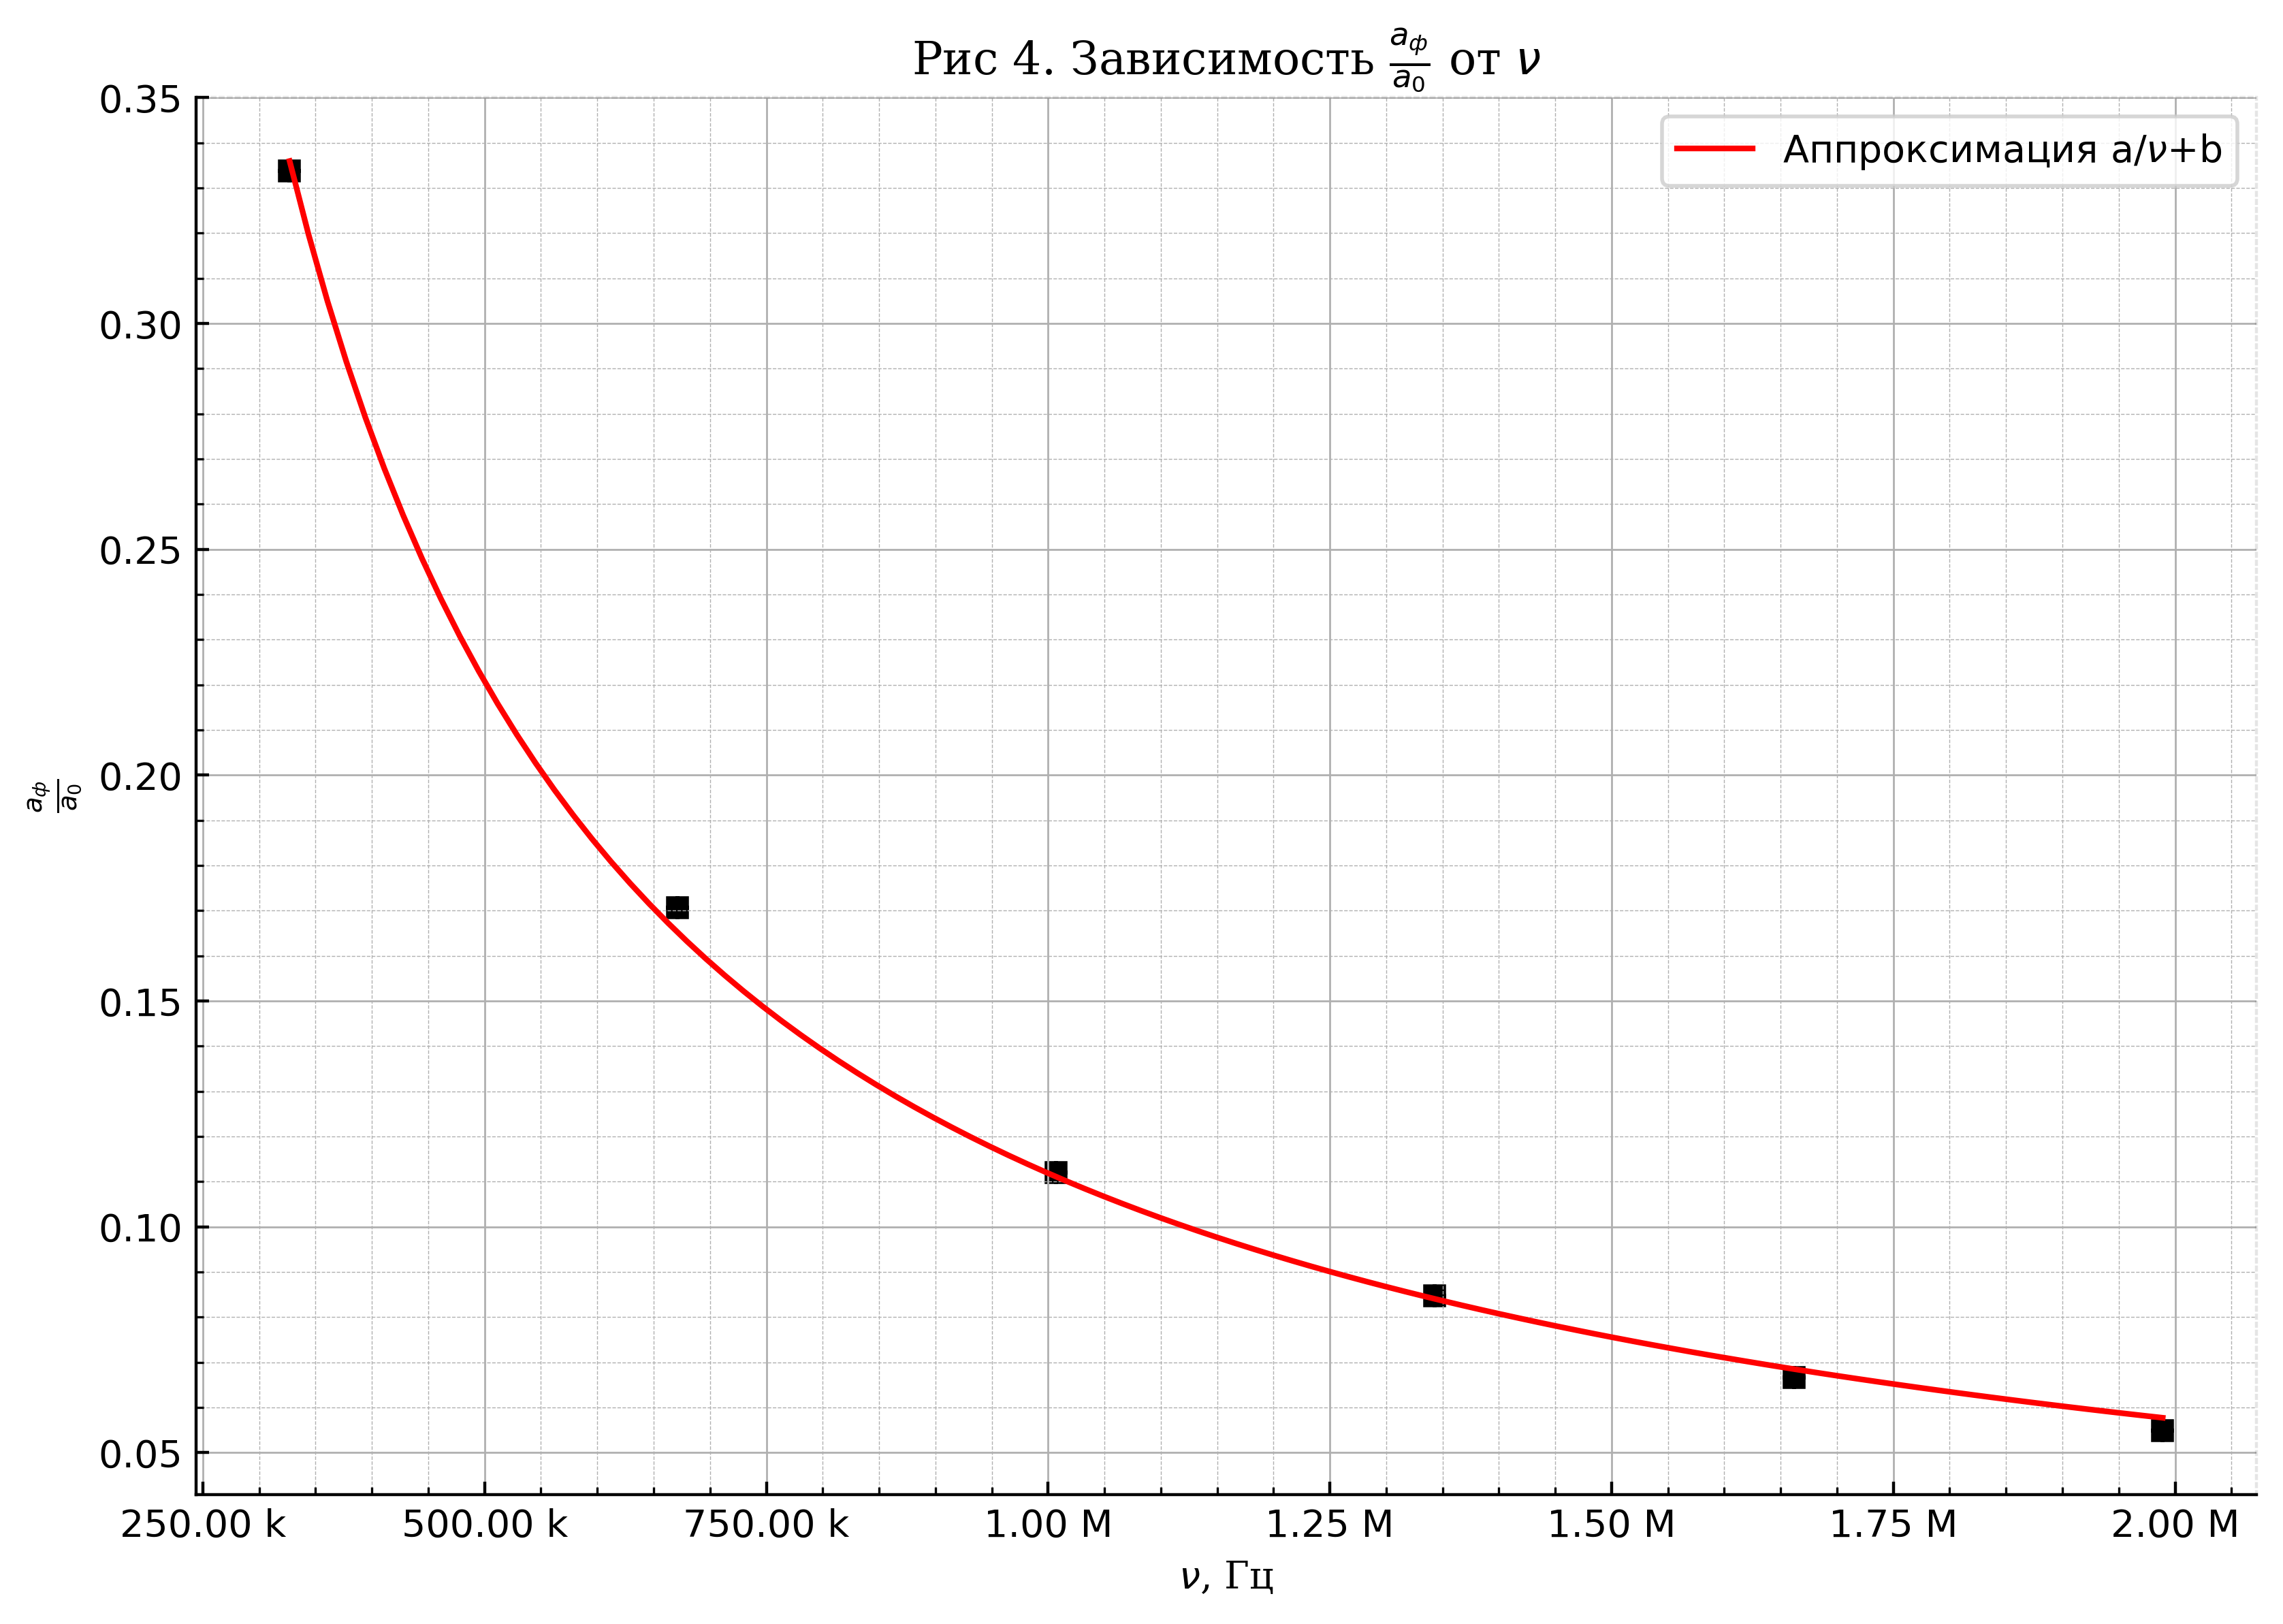

In [5]:
a_filtered = np.array( [93.11, 48.87, 31.92, 23.65, 17.87, 13.73] )
a_orig = np.array( [279, 286.4, 284.8, 279, 268.2, 250.4 ] )
Y = a_filtered / a_orig
X = np.array( [ 0.327e6, 0.671e6, 1.007e6, 1.343e6, 1.662e6, 1.989e6 ] )

fig3 = mg.make_figure(dpi_mode='high')
ax3 = fig3.add_subplot()
formatter1 = EngFormatter(places=2) 
ax3.xaxis.set_major_formatter(formatter1)
# ax3.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig3)
mg.set_title(ax3, r'Зависимость $\frac{a_{ф}}{a_{0}}$ от $\nu$')
mg.set_label(ax3, r'$\nu$, Гц', r'$\frac{a_{ф}}{a_{0}}$' )

mg.draw_errorbar(ax3, X, Y)
#k, s_k, b, s_b = mg.linls(X, Y)
def f(x, a, b):
    return a/x + b
from scipy.optimize import curve_fit
a, b = curve_fit(f, X, Y)[0] 
X = np.linspace(X[0], X[5], 100)
ax3.plot(X, a/X+b, c='r', label=r'Аппроксимация a/$\nu$+b')
print(f'a, b = {a:E}, {b}')
ax3.legend()

Коэффиценты прямой: k, s_k, b, s_b
-0.9995507440983344	0.013027253588916219	11.617073453843119	0.007935825519287064
9.010919359734675e-06
8.307262792055015e-07


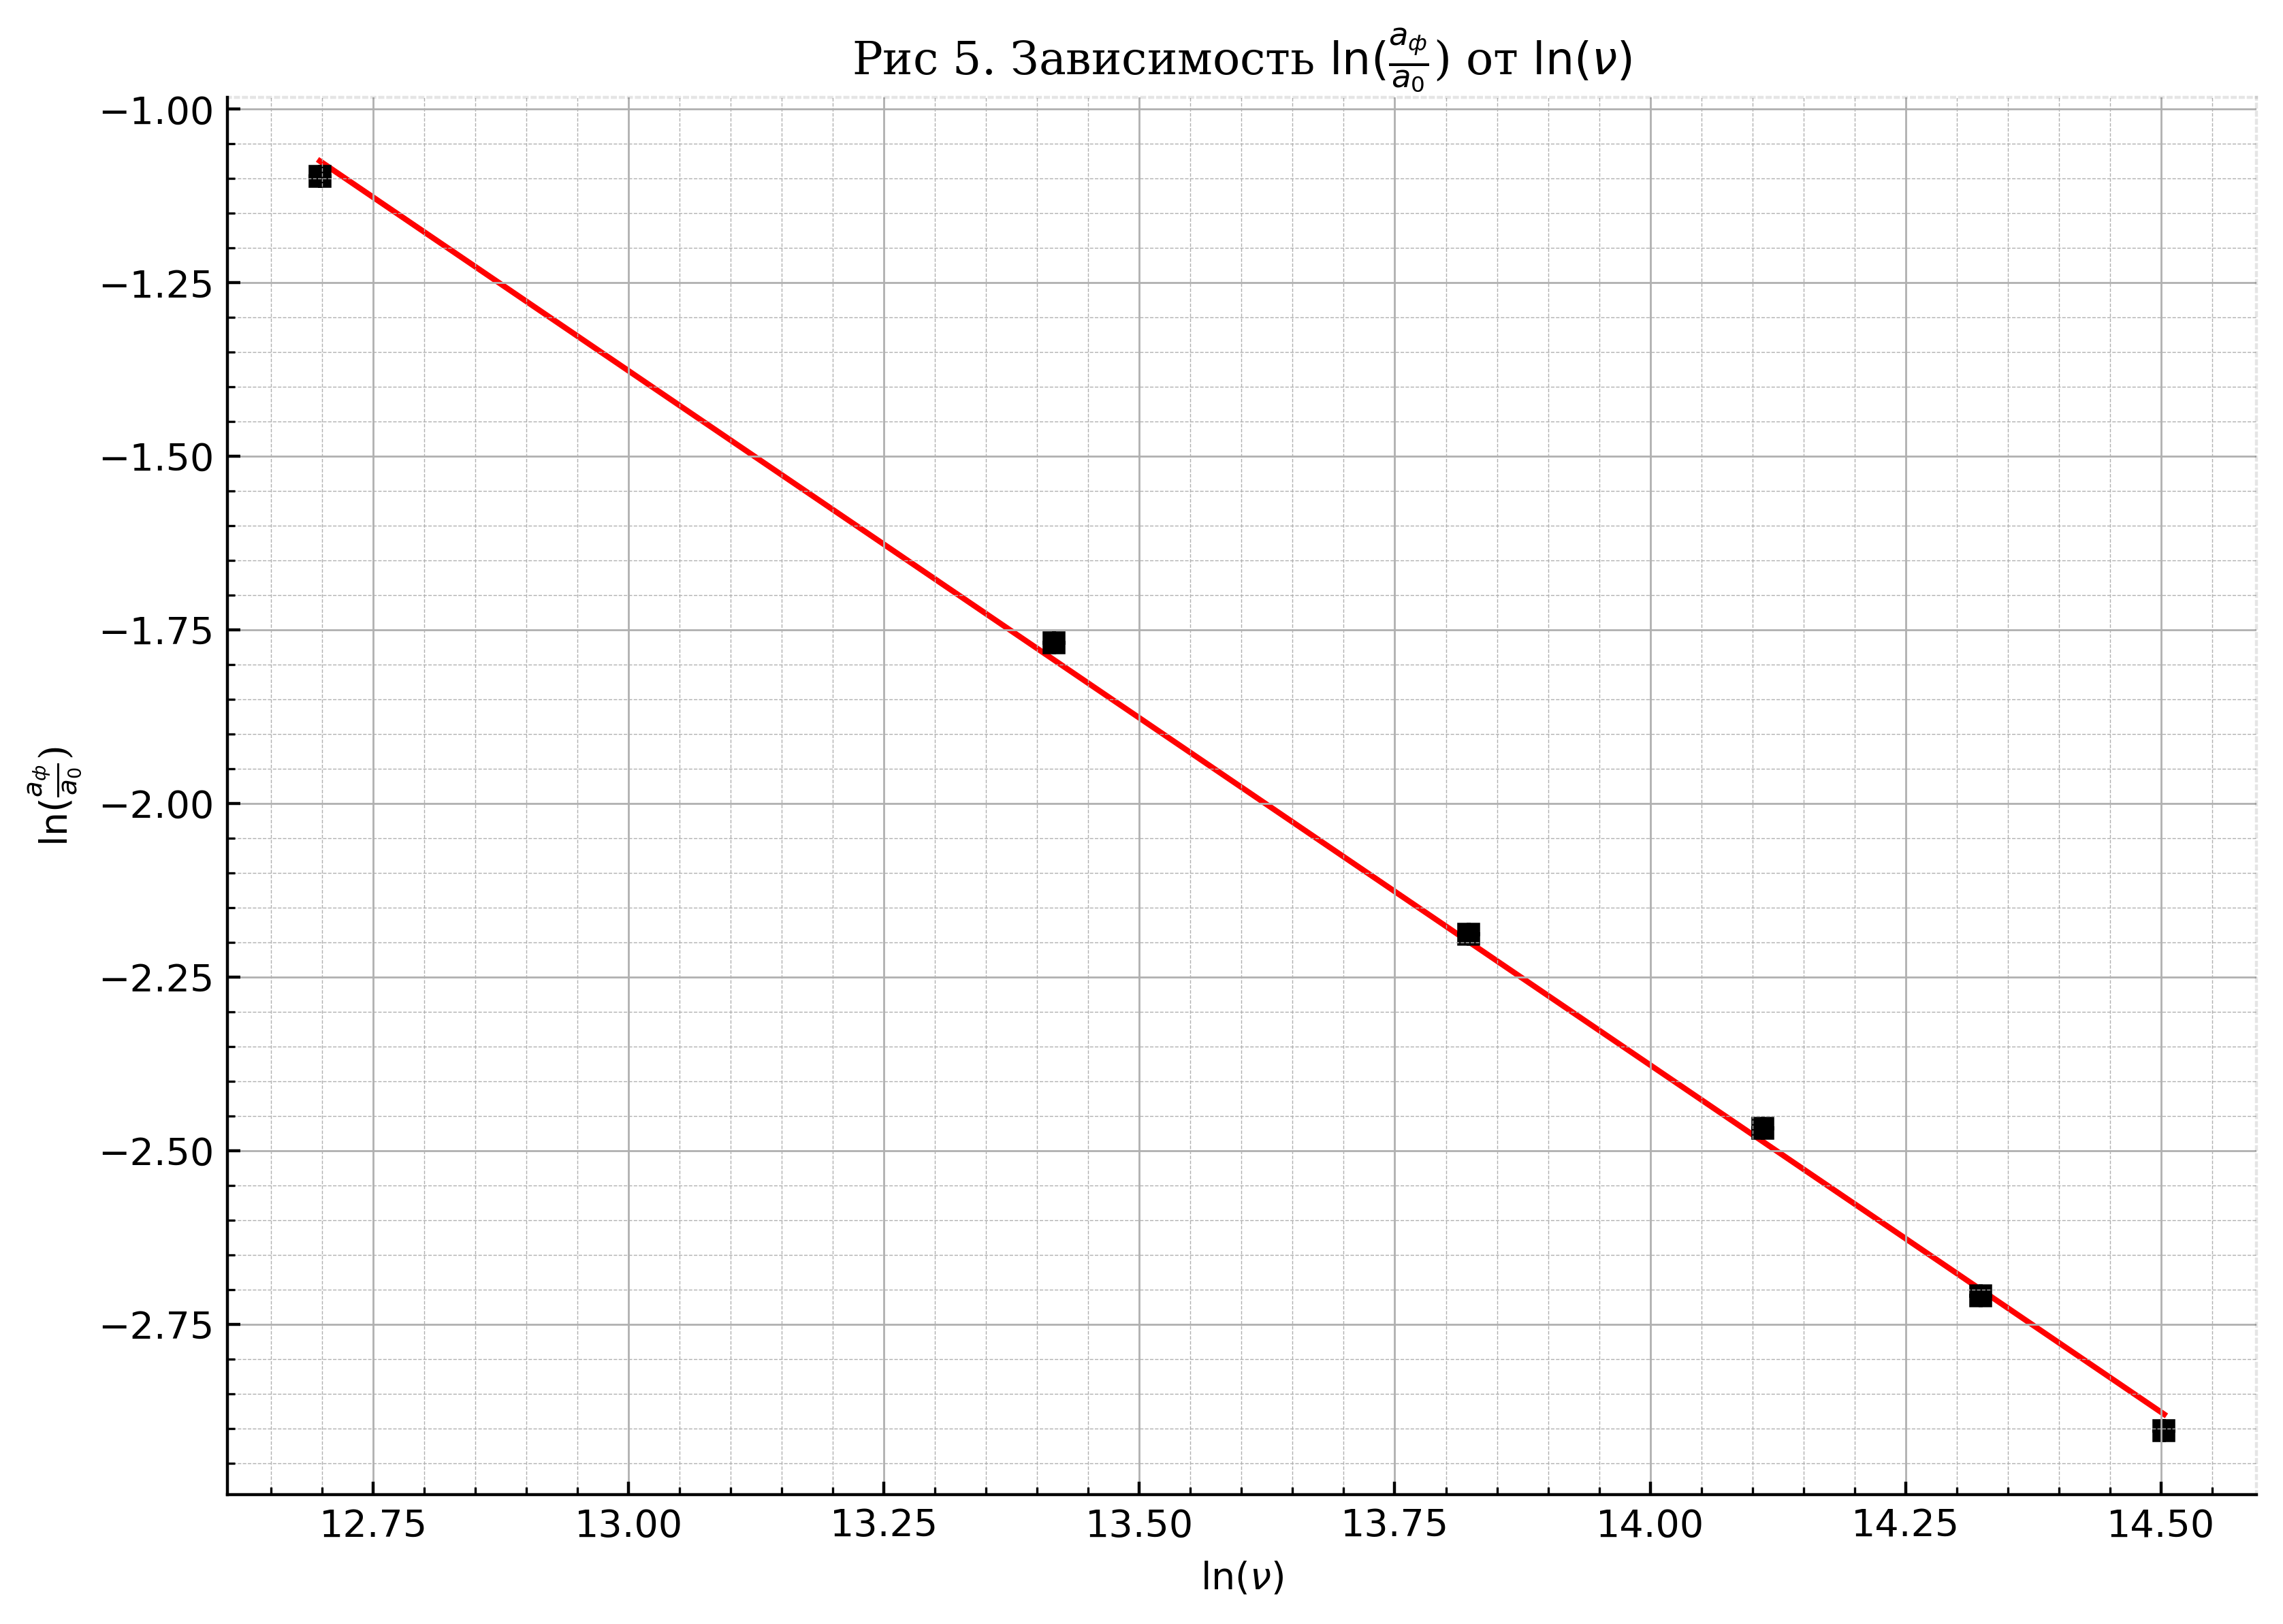

In [6]:
a_filtered = np.array( [93.11, 48.87, 31.92, 23.65, 17.87, 13.73] )
a_orig = np.array( [279, 286.4, 284.8, 279, 268.2, 250.4 ] )
Y = np.log( a_filtered / a_orig )
X = np.log( np.array( [ 0.327e6, 0.671e6, 1.007e6, 1.343e6, 1.662e6, 1.989e6 ] ) )

fig4 = mg.make_figure(dpi_mode='high')
ax4 = fig4.add_subplot()
formatter1 = EngFormatter(places=0) 
# ax4.xaxis.set_major_formatter(formatter1)
# ax4.yaxis.set_major_formatter(formatter1)
mg.set_grids(fig4)
mg.set_title(ax4, r'Зависимость $\ln(\frac{a_{ф}}{a_{0}}$) от $\ln(\nu)$')
mg.set_label(ax4, r'$\ln(\nu)$', r'$\ln(\frac{a_{ф}}{a_{0}}$)' )

mg.draw_errorbar(ax4, X, Y)
k, s_k, b, s_b = mg.linls(X, Y)
mg.display_linls(ax4)

a = np.exp(b)
print(1/a)
sigma_rc = b * np.exp(-b) * s_b
print(sigma_rc)